importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

importing KGbench?

In [ ]:
!git clone https://github.com/pbloem/kgbench-loader
%cd kgbench-loader
!pip install .

Cloning into 'kgbench-loader'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 138 (delta 79), reused 91 (delta 39), pack-reused 0 (from 0)
Receiving objects: 100% (138/138), 45.12 KiB | 1.61 MiB/s, done.
Resolving deltas: 100% (79/79), done.
/content/kgbench-loader
Processing /content/kgbench-loader
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.9/564.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s et

In [ ]:
import kgbench as kg

data = kg.load('dmg777k', torch=True, final=False)

print(type(data.triples))
print(data.training.shape)
print(data.withheld.shape)




loaded data dmg777k (71.96s).
<class 'torch.Tensor'>
torch.Size([5394, 2])
torch.Size([1001, 2])


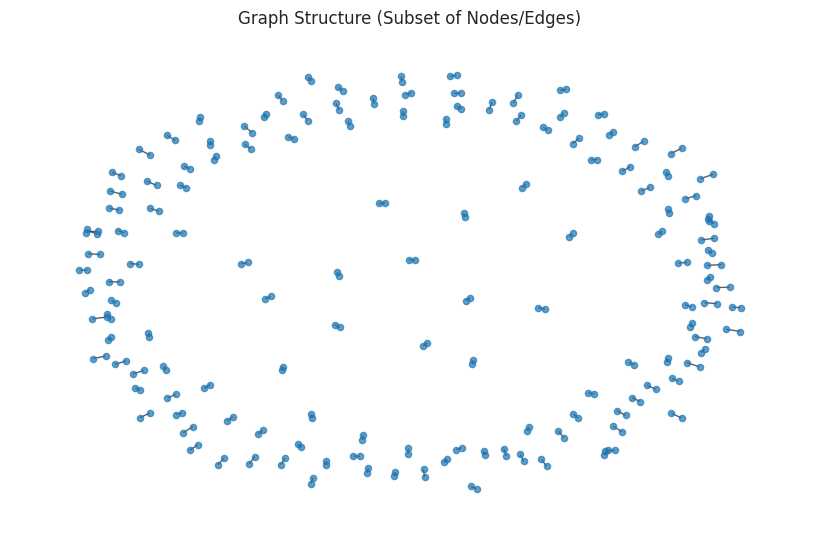

In [ ]:
import networkx as nx
import numpy

G = nx.Graph()
edges = [(u, v) for u, r, v in data.triples[:140]]
G.add_edges_from(edges)


plt.figure(figsize=(8, 5))
nx.draw(G, with_labels=False, node_size=20, alpha=0.7)
plt.title("Graph Structure (Subset of Nodes/Edges)")
plt.show()

In [ ]:
data.triples

tensor([[130685,     28,  54795],
        [130685,     31, 201822],
        [130690,     28,  58948],
        ...,
        [271591,     31, 211084],
        [271593,     31, 211084],
        [271598,     31, 211084]])

In [ ]:
print(data.triples.shape)

torch.Size([777124, 3])


the above plotted graph looks kinda way too centralized, so to check if its just a visualization problem for the first n edges, im gonna plot some randomly.

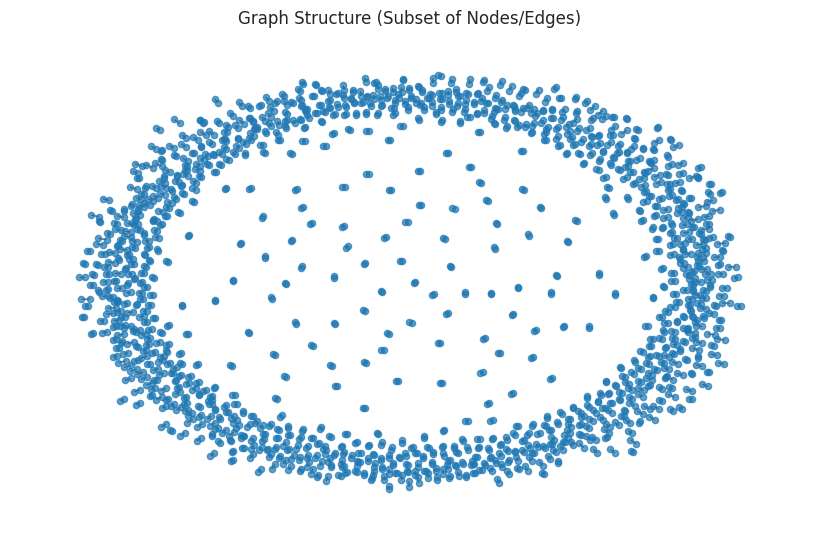

In [ ]:
import random

G = nx.Graph()


sampled_triples = random.sample(list(data.triples), 1000)
sampled_edges = [(u, v) for u, r, v in sampled_triples[:]]


G.add_edges_from(sampled_edges)


plt.figure(figsize=(8, 5))
nx.draw(G, with_labels=False, node_size=20, alpha=0.7)
plt.title("Graph Structure (Subset of Nodes/Edges)")
plt.show()

Ok so it seems like it was probably an edge case and upon sampling randomly we're getting more irregular graphs.
Though I plotted it randomly now, upon further understanding and research, it seems that due to the way graph like relations arise in nature or society or in artificial settings, they will often be found in unrandom ways, or atleast more ordered than I had initially expected.

plotting the nodes themselves

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch  # In case training data is a torch tensor
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
if hasattr(data.training, 'cpu'):
    training_triples = data.training.cpu().numpy()
else:
    training_triples = np.array(data.training)

# Assuming the triples are structured as (subject, predicate, object)
triples_df = pd.DataFrame(training_triples, columns=["subject" ,"predicate" ,"object"])
print("Total training triples:", triples_df.shape[0])
display(triples_df.head())

ValueError: Shape of passed values is (5394, 2), indices imply (5394, 3)

In [ ]:
edge_type_counts = triples_df["predicate"].value_counts().reset_index()
edge_type_counts.columns = ["Edge Type", "Count"]

print("Edge Type Counts:")
print(edge_type_counts)

plt.figure(figsize=(10,6))
sns.barplot(data=edge_type_counts, x="Edge Type", y="Count", palette="magma")
plt.title("Distribution of Edge Types in dmg777k Training Triples")
plt.xlabel("Edge Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

KeyError: 'predicate'

In [ ]:
import numpy as np
import pandas as pd

# Convert training triples to a numpy array.
if hasattr(data.training, 'cpu'):
    training_triples = data.training.cpu().numpy()
else:
    training_triples = np.array(data.training)

# Create the DataFrame based on the number of columns
if training_triples.shape[1] == 3:
    triples_df = pd.DataFrame(training_triples, columns=["subject", "predicate", "object"])
elif training_triples.shape[1] == 2:
    triples_df = pd.DataFrame(training_triples, columns=["subject", "object"])
else:
    raise ValueError("Unexpected number of columns in training triples.")

print("Triples DataFrame shape:", triples_df.shape)
display(triples_df.head())

Triples DataFrame shape: (5394, 2)


,subject,object
0,282346,1
1,276422,4
2,277418,1
3,278994,3
4,279486,1


<ipython-input-18-0c26bd414046>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edge_type_counts, x="Edge Type", y="Count", palette="magma")


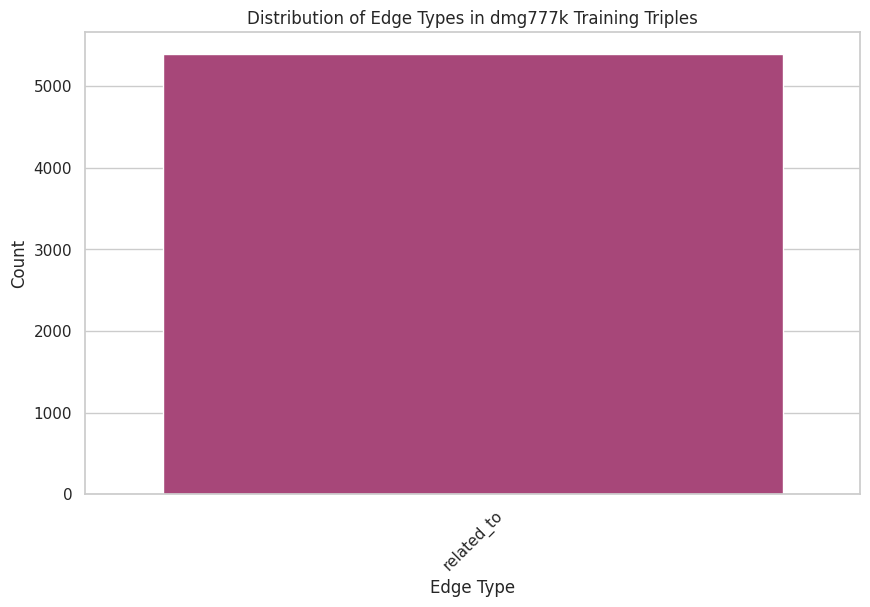

In [ ]:
# If there is no predicate column, create one with a default value.
if "predicate" not in triples_df.columns:
    triples_df["predicate"] = "related_to"

# Now, count the edge types
edge_type_counts = triples_df["predicate"].value_counts().reset_index()
edge_type_counts.columns = ["Edge Type", "Count"]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

plt.figure(figsize=(10,6))
sns.barplot(data=edge_type_counts, x="Edge Type", y="Count", palette="magma")
plt.title("Distribution of Edge Types in dmg777k Training Triples")
plt.xlabel("Edge Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
subjects = set(triples_df["subject"].unique())
objects = set(triples_df["object"].unique())
all_nodes = subjects.union(objects)
print("Total number of unique nodes (from training triples):", len(all_nodes))

Total number of unique nodes (from training triples): 5399


Shape of training triples: (5394, 2)
Triples DataFrame shape: (5394, 3)
   subject  object   predicate
0   282346       1  related_to
1   276422       4  related_to
2   277418       1  related_to
3   278994       3  related_to
4   279486       1  related_to
Total number of unique nodes: 5399
Sample e2i mapping: {np.int32(0): 0, np.int32(1): 1, np.int32(2): 2, np.int32(3): 3, np.int32(4): 4}
Sample i2e mapping: {0: np.int32(0), 1: np.int32(1), 2: np.int32(2), 3: np.int32(3), 4: np.int32(4)}
No explicit node type information found in the triples.
Edge type counts:
predicate
related_to    5394
Name: count, dtype: int64


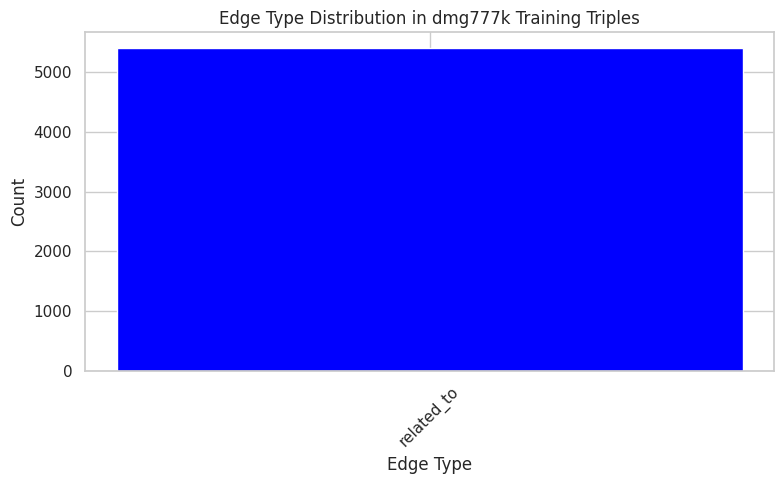

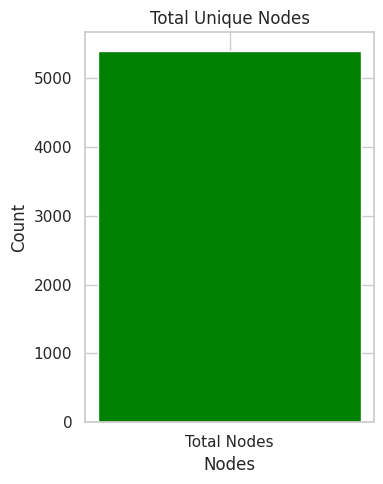

Summary:
 - Total training triples: 5394
 - Total unique nodes: 5399
 - Edge types found: ['related_to']
 - Node type information not explicitly provided in the triples.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# --- Convert Training Triples to a NumPy Array ---
# If the training data is a torch.Tensor, convert it to a NumPy array.
if hasattr(data.training, 'cpu'):
    training_triples = data.training.cpu().numpy()
else:
    training_triples = np.array(data.training)

print("Shape of training triples:", training_triples.shape)

# --- Create a DataFrame for the Triples ---
# If there are 3 columns, assume (subject, predicate, object).
# If only 2 columns, add a default predicate.
if training_triples.shape[1] == 3:
    triples_df = pd.DataFrame(training_triples, columns=["subject", "predicate", "object"])
elif training_triples.shape[1] == 2:
    triples_df = pd.DataFrame(training_triples, columns=["subject", "object"])
    # Add a default predicate since no relation info is provided.
    triples_df["predicate"] = "related_to"
else:
    raise ValueError("Unexpected number of columns in training triples.")

print("Triples DataFrame shape:", triples_df.shape)
print(triples_df.head())

# --- Extract Unique Nodes and Build Mappings ---
# Get unique nodes from both 'subject' and 'object' columns.
subjects = set(triples_df["subject"].unique())
objects  = set(triples_df["object"].unique())
all_nodes = sorted(list(subjects.union(objects)))
total_nodes = len(all_nodes)
print("Total number of unique nodes:", total_nodes)

# Build the mapping: Entity-to-Index (e2i) and Index-to-Entity (i2e)
e2i = {node: idx for idx, node in enumerate(all_nodes)}
i2e = {idx: node for node, idx in e2i.items()}

print("Sample e2i mapping:", {k: e2i[k] for k in list(e2i)[:5]})
print("Sample i2e mapping:", {k: i2e[k] for k in list(i2e)[:5]})

# --- Extract Node Type Information (if available) ---
# Many knowledge graph datasets include type information encoded in triples.
# We look for triples where the predicate is "type". Change this value if your dataset uses a different label.
node_type_triples = triples_df[triples_df["predicate"] == "type"]

if not node_type_triples.empty:
    # In these triples, the 'subject' is the node and 'object' gives its type.
    node_type_counts = node_type_triples["object"].value_counts()
    print("Node type counts:")
    print(node_type_counts)
else:
    print("No explicit node type information found in the triples.")

# --- Compute Edge Type Distribution ---
# Every triple's predicate represents an edge type.
edge_type_counts = triples_df["predicate"].value_counts()
print("Edge type counts:")
print(edge_type_counts)

# --- Plotting with Matplotlib Only ---

# Plot Edge Type Distribution
plt.figure(figsize=(8,5))
plt.bar(edge_type_counts.index, edge_type_counts.values, color='blue')
plt.xlabel("Edge Type")
plt.ylabel("Count")
plt.title("Edge Type Distribution in dmg777k Training Triples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Node Type Distribution (if available)
if not node_type_triples.empty:
    plt.figure(figsize=(8,5))
    plt.bar(node_type_counts.index, node_type_counts.values, color='green')
    plt.xlabel("Node Type")
    plt.ylabel("Count")
    plt.title("Node Type Distribution (Extracted from Triples)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    # If no type info is available, plot the total unique node count as a single bar.
    plt.figure(figsize=(4,5))
    plt.bar(["Total Nodes"], [total_nodes], color='green')
    plt.xlabel("Nodes")
    plt.ylabel("Count")
    plt.title("Total Unique Nodes")
    plt.tight_layout()
    plt.show()

# --- Print Summary ---
print("Summary:")
print(" - Total training triples:", training_triples.shape[0])
print(" - Total unique nodes:", total_nodes)
print(" - Edge types found:", list(edge_type_counts.index))
if not node_type_triples.empty:
    print(" - Node types found:", list(node_type_counts.index))
else:
    print(" - Node type information not explicitly provided in the triples.")

loaded data dmg777k (68.81s).
Attributes in the loaded dataset:
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_datatypes', '_dt_g2l', '_dt_l2g', 'datatype_g2l', 'datatype_l2g', 'datatypes', 'dgl', 'e2i', 'final', 'get_images', 'get_images_batch', 'get_strings', 'get_strings_batch', 'i2e', 'i2r', 'name', 'num_classes', 'num_entities', 'num_relations', 'pyg', 'r2i', 'torch', 'training', 'triples', 'withheld']

No explicit nodes attribute found in data; node information will be extracted from triples.

Shape of training triples: (5394, 2)

Triples DataFrame shape: (5394, 3)
   subject  object   predicate
0   282346       1  related_to
1   276422       4  related_to
2   277418   

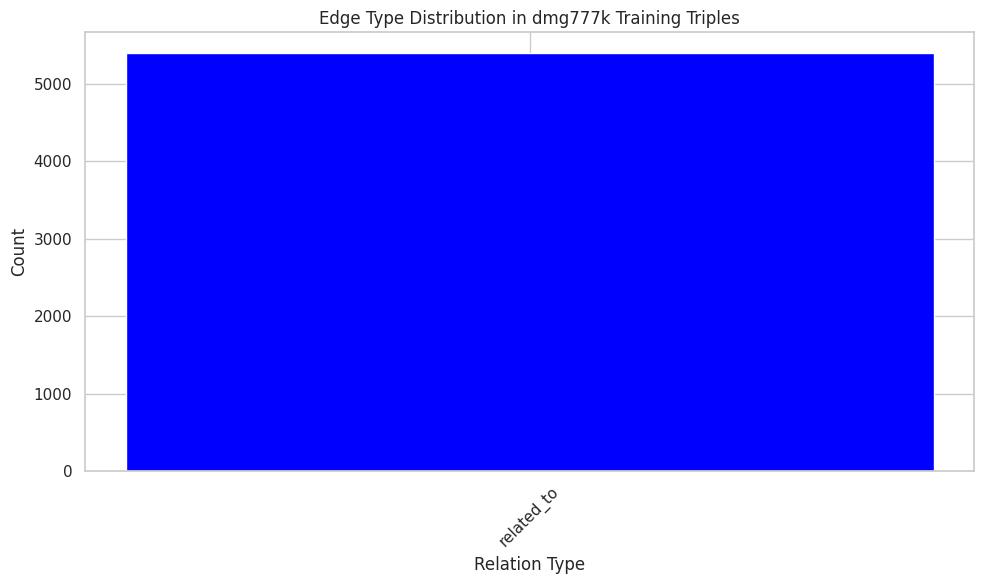


Since explicit node data is not available, using nodes extracted from triples.


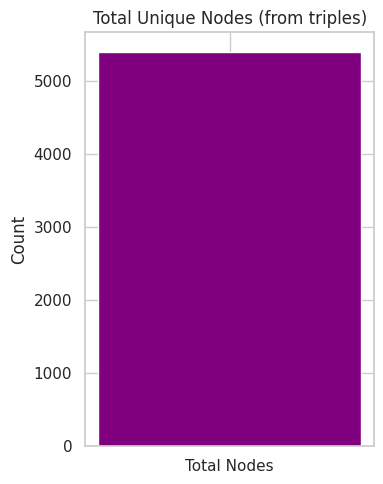


Summary:
 - Total training triples: 5394
 - Total unique nodes (from triples): 5399
 - Edge types found: ['related_to']
 - Node information extracted from triples only (no additional literals available).


In [ ]:
# --- Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load the Dataset ---
# Load the multimodal version by setting final=False.
# (Double-check the kgbench documentation that final=False gives the full data.)
import kgbench as kg
data = kg.load('dmg777k', torch=True, final=False)

# --- Inspect the Data Object ---
# List available attributes (this can help you see what is provided)
print("Attributes in the loaded dataset:")
print(dir(data))

# --- Process Node Information ---
# If the dataset includes an explicit 'nodes' attribute with rich (multimodal) information,
# convert it into a DataFrame.
nodes_df = None
if hasattr(data, 'nodes'):
    nodes_df = pd.DataFrame(data.nodes)
    print("\nSample node data (first 5 rows):")
    print(nodes_df.head())
else:
    print("\nNo explicit nodes attribute found in data; node information will be extracted from triples.")

# --- Process Training Triples ---
# Convert training triples to a NumPy array.
if hasattr(data.training, 'cpu'):
    training_triples = data.training.cpu().numpy()
else:
    training_triples = np.array(data.training)

print("\nShape of training triples:", training_triples.shape)

# Create a DataFrame for triples.
# If there are 3 columns, assume they are (subject, predicate, object).
# If only 2 columns, add a default predicate.
if training_triples.shape[1] == 3:
    triples_df = pd.DataFrame(training_triples, columns=["subject", "predicate", "object"])
elif training_triples.shape[1] == 2:
    triples_df = pd.DataFrame(training_triples, columns=["subject", "object"])
    triples_df["predicate"] = "related_to"
else:
    raise ValueError("Unexpected number of columns in training triples.")

print("\nTriples DataFrame shape:", triples_df.shape)
print(triples_df.head())

# --- Build Node Mappings from Triples (if no explicit node data exists) ---
# Extract unique nodes from the subjects and objects.
subjects = set(triples_df["subject"].unique())
objects  = set(triples_df["object"].unique())
all_nodes = sorted(list(subjects.union(objects)))
total_nodes = len(all_nodes)
print("\nTotal number of unique nodes (from triples):", total_nodes)

# Create entity-to-index (e2i) and index-to-entity (i2e) mappings.
e2i = {node: idx for idx, node in enumerate(all_nodes)}
i2e = {idx: node for node, idx in e2i.items()}

print("\nSample e2i mapping:", dict(list(e2i.items())[:5]))
print("Sample i2e mapping:", dict(list(i2e.items())[:5]))

# --- Analyze Relation (Edge) Types ---
# If the training triples include a predicate column with real relation types, this should be visible.
relation_counts = triples_df["predicate"].value_counts()
print("\nEdge type (relation) counts:")
print(relation_counts)

# --- Plot Edge Type Distribution using matplotlib ---
plt.figure(figsize=(10,6))
plt.bar(relation_counts.index, relation_counts.values, color='blue')
plt.xlabel("Relation Type")
plt.ylabel("Count")
plt.title("Edge Type Distribution in dmg777k Training Triples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Analyze Node Type / Modality Information ---
# If nodes_df exists and contains modality or type information, plot its distribution.
if nodes_df is not None:
    if 'modality' in nodes_df.columns:
        modality_counts = nodes_df['modality'].value_counts()
        print("\nNode modality counts:")
        print(modality_counts)
        plt.figure(figsize=(8,5))
        plt.bar(modality_counts.index, modality_counts.values, color='green')
        plt.xlabel("Modality")
        plt.ylabel("Count")
        plt.title("Node Modality Distribution in dmg777k")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    elif 'type' in nodes_df.columns:
        type_counts = nodes_df['type'].value_counts()
        print("\nNode type counts:")
        print(type_counts)
        plt.figure(figsize=(8,5))
        plt.bar(type_counts.index, type_counts.values, color='orange')
        plt.xlabel("Node Type")
        plt.ylabel("Count")
        plt.title("Node Type Distribution in dmg777k")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo explicit modality or type column found in node data.")
        # Optionally, you might plot just the total node count as one bar.
        plt.figure(figsize=(4,5))
        plt.bar(["Total Nodes"], [total_nodes], color='purple')
        plt.title("Total Unique Nodes")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
else:
    print("\nSince explicit node data is not available, using nodes extracted from triples.")
    plt.figure(figsize=(4,5))
    plt.bar(["Total Nodes"], [total_nodes], color='purple')
    plt.title("Total Unique Nodes (from triples)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# --- Print Overall Summary ---
print("\nSummary:")
print(" - Total training triples:", training_triples.shape[0])
print(" - Total unique nodes (from triples):", total_nodes)
print(" - Edge types found:", list(relation_counts.index))
if nodes_df is not None:
    if 'modality' in nodes_df.columns:
        print(" - Node modalities found:", list(modality_counts.index))
    elif 'type' in nodes_df.columns:
        print(" - Node types found:", list(type_counts.index))
    else:
        print(" - No explicit node modality/type information found in node data.")
else:
    print(" - Node information extracted from triples only (no additional literals available).")
